In [2]:
import pandas as pd

In [3]:
cars_df = pd.read_csv("/Users/wiltonngo/Downloads/car_price_prediction.csv")


In [4]:
cars_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Remove ID Column

In [5]:
cars_df.drop(["ID"], axis=1, inplace=True)

## Report the top 3 car Manufacturers with the Highest Mean Sales Price

In [6]:
cars_df.groupby("Manufacturer")["Price"].mean().nlargest(3)

Manufacturer
LAMBORGHINI    872946.000000
BENTLEY        197574.500000
OPEL            73305.617128
Name: Price, dtype: float64

## Convert the Mileage Column to a floating point Number Type

In [7]:
cars_df["Mileage"]

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19231    300000 km
19232    161600 km
19233    116365 km
19234     51258 km
19235    186923 km
Name: Mileage, Length: 19236, dtype: object

In [8]:
cars_df["Mileage"] = cars_df["Mileage"].apply(lambda x:float(x.split(" ")[0]))

In [9]:
cars_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Replace the Dashes from the Levy Column with Zeroes

In [12]:
cars_df["Levy"]

0        1399
1        1018
2           -
3         862
4         446
         ... 
19231       -
19232     831
19233     836
19234    1288
19235     753
Name: Levy, Length: 19236, dtype: object

In [13]:
cars_df["Levy"] = cars_df["Levy"].apply(lambda x: int(x.replace("-","0")))

In [14]:
cars_df["Levy"]

0        1399
1        1018
2           0
3         862
4         446
         ... 
19231       0
19232     831
19233     836
19234    1288
19235     753
Name: Levy, Length: 19236, dtype: int64

## Create a Bar Plot Showing the Counts of the top 10 Most Popular

In [14]:
import matplotlib.pyplot as plt

In [21]:
top_ten_manufacturers = cars_df["Manufacturer"].value_counts().nlargest(10)

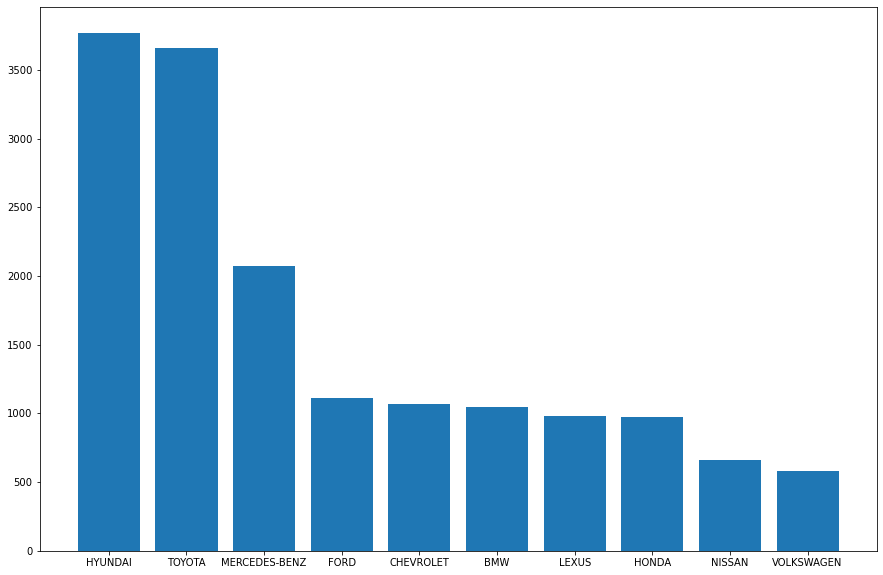

In [23]:
plt.figure(figsize=(15,10))
plt.bar(x=top_ten_manufacturers.keys(), height = top_ten_manufacturers.values,);

## Analyze Mileage and Histogram and Remove Outliers

In [11]:
cars_df["Mileage"] = cars_df["Mileage"].clip(lower=0,upper=750000)

Text(0, 0.5, 'Frequency')

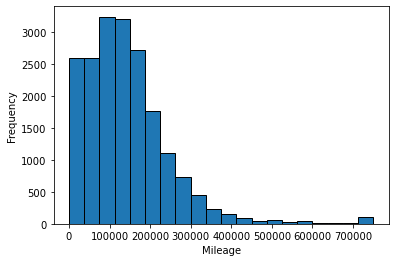

In [16]:
plt.hist(cars_df["Mileage"],edgecolor="black",bins=20)
plt.xlabel("Mileage")
plt.ylabel("Frequency")

In [18]:
import xgboost
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'xgboost'